In [32]:
#Carga de librerías#
import pandas as pd
import numpy as np
import geopandas as gdp
from shapely.geometry import Point
%matplotlib inline
import matplotlib.pyplot as plt
import folium
from folium import plugins
import seaborn as sns
# otras librerias
from datetime import datetime
import matplotlib.pyplot as matplt
import cufflinks as cf
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='white',offline=True)

In [33]:
#Lee el archivo...
data_BESS_and_solar = pd.read_csv("Grid_and_zero_csv/BESS_and_solar.csv",sep = ";")# error_bad_lines=False)

#visualización de las columnas:
print("Columnas: \n",data_BESS_and_solar.columns)

print("\n")
#veamos las empresas:
print("Empresas con sistemas BESS + Solar (Híbrido):\n",data_BESS_and_solar['Empresa Solicitante'].unique())


data_BESS_and_solar.dtypes

Columnas: 
 Index(['Index', 'Id', 'Proyecto', 'NUP', 'Empresa Solicitante', 'Tipo',
       'Estado Solicitud', 'Fecha Recepción', 'Capacidad [MW]',
       'Tipo Proyecto', 'Sólo BESS', 'BESS+Solar', 'BESS+Eólico',
       'Capacidad BESS (MW)', 'Cap. BESS + Solar (MWh)',
       'Cap. BESS+ Eolico (MWh)', 'Número de Hrs almacenamiento',
       'Fecha Estimada Conexión', 'Punto de Conexión', 'Nivel de tension',
       'Barra', 'Paño', 'Región', 'Comuna', 'Segmento de Transmisión',
       'Fecha emisión informe definitivo',
       'Plazo obtención declaración en const',
       'Prórroga plazo obtención declaración en const.'],
      dtype='object')


Empresas con sistemas BESS + Solar (Híbrido):
 ['Membrillo SpA' 'Parque Fotovoltaico Hualo SpA'
 'Aes Chile Inversiones Renovables SpA' 'Plantar Solar SPV I SpA'
 'Copiapó Solar S.A.' 'Cristaria Solar SpA'
 'Gestión y Asesoria de Energía SpA.' 'Las Mellizas Generación SpA.'
 'Grenergy Renovables Pacific Limitada' 'RWE Renewables Chile SpA'
 'S

Index                                               int64
Id                                                  int64
Proyecto                                           object
NUP                                               float64
Empresa Solicitante                                object
Tipo                                               object
Estado Solicitud                                   object
Fecha Recepción                                    object
Capacidad [MW]                                    float64
Tipo Proyecto                                      object
Sólo BESS                                          object
BESS+Solar                                         object
BESS+Eólico                                        object
Capacidad BESS (MW)                               float64
Cap. BESS + Solar (MWh)                            object
Cap. BESS+ Eolico (MWh)                           float64
Número de Hrs almacenamiento                       object
Fecha Estimada

In [212]:
data_BESS_and_solar.columns

data_BESS_and_solar_filtrada = data_BESS_and_solar[["Index","Proyecto","Empresa Solicitante","Tipo","Estado Solicitud",
                               "Fecha Recepción","Capacidad [MW]",
                                'Capacidad BESS (MW)', 'Cap. BESS + Solar (MWh)',
                                'Número de Hrs almacenamiento','Fecha Estimada Conexión',
                                'Punto de Conexión', 'Nivel de tension',
       'Barra', 'Paño', 'Región', 'Comuna', 'Segmento de Transmisión']]

data_BESS_and_solar_filtrada.head(15)
#guarda_df_data_BESS_and_solar_filtrada = data_BESS_and_solar_filtrada.to_csv("Grid_and_zero_csv/output_data_BESS_and_solar_filtrada.csv")
#guarda_df_data_BESS_and_solar_filtrada

In [35]:
#Datos a analizar:
#numero de proyectos que posee cada empresa solicitantes.
#capacidad instalada de almacenamiento BESS x Región.
#Como se distribuyen los proyectos en las regiones.
# Número de horas de las baterias de almacenamiento!.

# 1. Número de proyectos que posee cada empresa solicitante y capacidad de almacenamiento BESS (MW)

In [36]:
proyectos_por_empresa = data_BESS_and_solar_filtrada.groupby(["Empresa Solicitante"])["Proyecto"].count()
print("Total de proyectos BESS+Solar:",proyectos_por_empresa.sum())
proyectos_por_empresa

#2/29*100

Total de proyectos BESS+Solar: 29


Empresa Solicitante
AR ENERGIA CHILE SPA                    1
Aes Chile Inversiones Renovables SpA    3
AustrianSolar Chile Dos SpA             1
AustrianSolar Chile Tres SpA            1
Bellavista Solar SpA.                   1
Copiapó Solar S.A.                      1
Cristaria Solar SpA                     1
EBCO Energía S.A.                       1
Eléctrica Las Frutillas SpA.            1
Enel Green Power del Sur                6
Gestión y Asesoria de Energía SpA.      1
Grenergy Renovables Pacific Limitada    1
Las Mellizas Generación SpA.            1
Longotoma Solar SpA.                    1
Membrillo SpA                           2
Orion Power SpA.                        1
Parque Fotovoltaico Hualo SpA           1
Plantar Solar SPV I SpA                 1
RWE Renewables Chile SpA                1
Solar Uno SpA                           1
Trivento SpA                            1
Name: Proyecto, dtype: int64

Empresa con mayor número de BESS+Solar:
1. Enel Green Power del Sur = 6 PROYECTOS BESS + Solar (20%)
2. Aes Chile Inversiones Renovables SpA = 3 PROYECTOS BESS + Solar (10.3%)
3. Membrillo SpA = 2 PROYECTOS BESS + Solar. (6.9%)


In [37]:
#Capacidad de almacenamiento por empresa:

In [38]:
capacidad_almacenamiento_por_empresa = data_BESS_and_solar_filtrada.groupby(["Empresa Solicitante"])["Capacidad [MW]"].sum()
capacidad_almacenamiento_por_empresa

Empresa Solicitante
AR ENERGIA CHILE SPA                      90.0
Aes Chile Inversiones Renovables SpA    1420.0
AustrianSolar Chile Dos SpA               80.0
AustrianSolar Chile Tres SpA             100.8
Bellavista Solar SpA.                    100.0
Copiapó Solar S.A.                       110.0
Cristaria Solar SpA                      120.0
EBCO Energía S.A.                        200.0
Eléctrica Las Frutillas SpA.             110.0
Enel Green Power del Sur                1830.0
Gestión y Asesoria de Energía SpA.       120.0
Grenergy Renovables Pacific Limitada     150.0
Las Mellizas Generación SpA.             140.0
Longotoma Solar SpA.                     336.0
Membrillo SpA                            215.0
Orion Power SpA.                         110.0
Parque Fotovoltaico Hualo SpA            240.0
Plantar Solar SPV I SpA                    9.0
RWE Renewables Chile SpA                 136.4
Solar Uno SpA                            250.0
Trivento SpA                            

In [39]:
#Obs: Capacidad instalada de plantas híbridas!, es decir, capacidad MW 
#considera plantas BESS+ Planta Solar. 
#Veamos cuanto es la cap. de sólo las BESS de estas plantas híbridas.

In [40]:
#Capacidad de almacenamiento por empresa (Sólo la capacidad instalada de BESS)
capacidad_almacenamiento_por_empresa_2 = data_BESS_and_solar_filtrada.groupby(["Empresa Solicitante"])["Capacidad BESS (MW)"].sum()
print("Capacidad BESS que se incorpora de las plantas híbridas (BESS+Solar):",capacidad_almacenamiento_por_empresa_2.sum())
capacidad_almacenamiento_por_empresa_2

Capacidad BESS que se incorpora de las plantas híbridas (BESS+Solar): 536.0


Empresa Solicitante
AR ENERGIA CHILE SPA                      0.0
Aes Chile Inversiones Renovables SpA      0.0
AustrianSolar Chile Dos SpA               0.0
AustrianSolar Chile Tres SpA              0.0
Bellavista Solar SpA.                     0.0
Copiapó Solar S.A.                        0.0
Cristaria Solar SpA                       0.0
EBCO Energía S.A.                         0.0
Eléctrica Las Frutillas SpA.              0.0
Enel Green Power del Sur                400.0
Gestión y Asesoria de Energía SpA.        0.0
Grenergy Renovables Pacific Limitada      0.0
Las Mellizas Generación SpA.              0.0
Longotoma Solar SpA.                      0.0
Membrillo SpA                            91.0
Orion Power SpA.                          0.0
Parque Fotovoltaico Hualo SpA             0.0
Plantar Solar SPV I SpA                   0.0
RWE Renewables Chile SpA                 45.0
Solar Uno SpA                             0.0
Trivento SpA                              0.0
Name: Capacida

In [ ]:
#Obs: No todas las plantas Híbridas (BESS+Solar) informan la capacidad de BESS/Cap. Solar, por lo 
#que el análisis es representativo de sólo las plantas que informan sus capacidades.

In [49]:
data_BESS_and_solar_filtrada_cap_informada = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada["Capacidad BESS (MW)"]> 0 ]
#Reset index:
data_BESS_and_solar_filtrada_cap_informada = data_BESS_and_solar_filtrada_cap_informada.reset_index(drop=True)

print("Número de proyectos que informan su cap. BESS+ Solar:",data_BESS_and_solar_filtrada_cap_informada['Proyecto'].count())
print("Total de proyectos BESS+Solar:",proyectos_por_empresa.sum())
print("Porcentaje que informa:",
      (data_BESS_and_solar_filtrada_cap_informada['Proyecto'].count()/proyectos_por_empresa.sum())*100,"%")

Número de proyectos que informan su cap. BESS+ Solar: 6
Total de proyectos BESS+Solar: 29
Porcentaje que informa: 20.689655172413794 %


In [50]:
#Transforma los groupby en dataframes:
#DF número de proyectos por empresa:
df_numero_proyectos_por_empresa = pd.DataFrame(proyectos_por_empresa)

#DF capacidad instalada almacenamiento por empresa:
df_capacidad_almacenamiento_por_empresa = pd.DataFrame(capacidad_almacenamiento_por_empresa)

#Merge de los datos:
df_merge_datos_1 = pd.merge(df_numero_proyectos_por_empresa,
                            df_capacidad_almacenamiento_por_empresa,
                            left_on='Empresa Solicitante', right_on='Empresa Solicitante')


df_merge_datos_1.rename(columns={"Proyecto": "Número de proyectos BESS"},inplace = True)

#df_merge_datos_1['Capacidad [MW]'].sum()

#mayor capacidad instalada: 
mayor_capacidad = df_merge_datos_1.sort_values('Capacidad [MW]',ascending=False)
print("capacidad instalada total:",mayor_capacidad["Capacidad [MW]"].sum())

mayor_capacidad



capacidad instalada total: 6277.2


,Número de proyectos BESS,Capacidad [MW]
Empresa Solicitante,,
Enel Green Power del Sur,6,1830.0
Aes Chile Inversiones Renovables SpA,3,1420.0
Trivento SpA,1,410.0
Longotoma Solar SpA.,1,336.0
Solar Uno SpA,1,250.0
Parque Fotovoltaico Hualo SpA,1,240.0
Membrillo SpA,2,215.0
EBCO Energía S.A.,1,200.0
Grenergy Renovables Pacific Limitada,1,150.0


In [ ]:
#Observaciones:
#Empresa con mayor número de BESS+Solar:

#1.Enel Green Power del Sur	= 6 PROYECTOS BESS + Solar
#2.Aes Chile Inversiones Renovables SpA = 3 PROYECTOS BESS + Solar
#3. Membrillo SpA = 2 PROYECTOS BESS

#Total número de proyectos = 29.

#Empresa con mayor capacidad instalada BESS +Solar (MW):
#1.Enel Green Power del Sur = 1830 MW
#2.Aes Chile Inversiones Renovables SpA = 1420 MW.
#3.Trivento SpA = 410 MW.

In [ ]:
#Mismo análisis pero con los proyectos que si informan su cap. Bess+Solar.

In [58]:
#Capacidad de almacenamiento por empresa considerando sólo BESS y excluyendo Solar.
data_BESS_and_solar_filtrada_cap_informada.head(1)
#Capacidad de almacenamiento por empresa (Sólo la capacidad instalada de BESS)
capacidad_almacenamiento_por_empresa_2 = data_BESS_and_solar_filtrada_cap_informada.groupby(["Empresa Solicitante"])["Capacidad BESS (MW)"].sum()
print("Capacidad BESS que se incorpora de las plantas híbridas (BESS+Solar):",capacidad_almacenamiento_por_empresa_2.sum())
capacidad_almacenamiento_por_empresa_2

#Número de proyectos por empresa que informan.
proyectos_por_empresa = data_BESS_and_solar_filtrada_cap_informada.groupby(["Empresa Solicitante"])["Proyecto"].count()
print("Total de proyectos BESS+Solar Informados:",proyectos_por_empresa.sum())
proyectos_por_empresa


Capacidad BESS que se incorpora de las plantas híbridas (BESS+Solar): 536.0
Total de proyectos BESS+Solar Informados: 6


Empresa Solicitante
Enel Green Power del Sur     3
Membrillo SpA                2
RWE Renewables Chile SpA     1
Name: Proyecto, dtype: int64

In [217]:
#Transforma los groupby en dataframes:
#DF número de proyectos por empresa:
df_numero_proyectos_por_empresa = pd.DataFrame(proyectos_por_empresa)

#DF capacidad instalada almacenamiento por empresa:
df_capacidad_almacenamiento_por_empresa = pd.DataFrame(capacidad_almacenamiento_por_empresa_2)

#Merge de los datos:
df_merge_datos_1 = pd.merge(df_numero_proyectos_por_empresa,
                            df_capacidad_almacenamiento_por_empresa,
                            left_on='Empresa Solicitante', right_on='Empresa Solicitante')


df_merge_datos_1.rename(columns={"Proyecto": "Número de proyectos BESS + Solar"},inplace = True)

#df_merge_datos_1['Capacidad [MW]'].sum()
df_merge_datos_1
#mayor capacidad instalada: 
mayor_capacidad = df_merge_datos_1.sort_values('Capacidad BESS (MW)',ascending=False)
print("capacidad instalada total:",mayor_capacidad["Capacidad BESS (MW)"].sum())
mayor_capacidad

#guarda el df para posterior análisis:
guarda_df_proyectos_capacidad_BESS_BESS_solar = mayor_capacidad.to_csv("Grid_and_zero_csv/output_df_proyectos_capacidad_BESS_BESS_solar.csv")
guarda_df_proyectos_capacidad_BESS_BESS_solar
mayor_capacidad

capacidad instalada total: 536.0


,Número de proyectos BESS + Solar,Capacidad BESS (MW)
Empresa Solicitante,,
Enel Green Power del Sur,3,400.0
Membrillo SpA,2,91.0
RWE Renewables Chile SpA,1,45.0


In [ ]:
#Observaciones:
#Empresa con mayor número de BESS+Solar:

#1.Enel Green Power del Sur = 3 PROYECTOS BESS+Solar
#2.Membrillo SpA = 2 PROYECTOS BESS+Solar
#3. RWE Renewables Chile SpA = 1 PROYECTOS BESS+Solar

#Total número de proyectos = 6.

#Empresa con mayor capacidad instalada BESS (MW):
#1.Enel Green Power del Sur = 400 WM
#2.Membrillo SpA = 91 MW
#3. RWE Renewables Chile SpA = 45 MW

## 2. Como se distribuyen los proyectos en las regiones.

In [61]:
#Como se distribuyen los proyectos en las COMUNAS.
distribucion_comuna = data_BESS_and_solar_filtrada.groupby(["Región", "Comuna","Capacidad [MW]","Empresa Solicitante"])["Proyecto"].count()
distribucion_comuna

Región                                Comuna           Capacidad [MW]  Empresa Solicitante                 
Antofagasta                           Antofagasta      205.0           Enel Green Power del Sur                1
                                      Sierra Gorda     500.0           Enel Green Power del Sur                1
Atacama                               Chañaral         80.0            AustrianSolar Chile Dos SpA             1
                                      Copiapó          75.0            Enel Green Power del Sur                1
                                                       100.8           AustrianSolar Chile Tres SpA            1
                                                       410.0           Enel Green Power del Sur                1
                                      Freirina         120.0           Cristaria Solar SpA                     1
                                      Tierra Amarilla  110.0           Copiapó Solar S.A.            

In [62]:
#Como se distribuyen los proyectos en las regiones.
distribucion_region = data_BESS_and_solar_filtrada.groupby(["Región","Capacidad [MW]","Empresa Solicitante"])["Proyecto"].count()
distribucion_region

Región                                Capacidad [MW]  Empresa Solicitante                 
Antofagasta                           205.0           Enel Green Power del Sur                1
                                      500.0           Enel Green Power del Sur                1
Atacama                               75.0            Enel Green Power del Sur                1
                                      80.0            AustrianSolar Chile Dos SpA             1
                                      100.8           AustrianSolar Chile Tres SpA            1
                                      110.0           Copiapó Solar S.A.                      1
                                      120.0           Cristaria Solar SpA                     1
                                      150.0           Grenergy Renovables Pacific Limitada    1
                                      410.0           Enel Green Power del Sur                1
Coquimbo                              240.0  

In [64]:
#capacidad instalada de almacenamiento BESS+Solar x Región
analisis_region = data_BESS_and_solar_filtrada.groupby(["Región"])["Capacidad [MW]"].sum()
analisis_region
#Transforma el groupby en un dataframe:
#DF capacidad instalada por región:
df_capacidad = pd.DataFrame(analisis_region)
df_capacidad

# número de proyectos por región 
numero_empresas_por_region = data_BESS_and_solar_filtrada.groupby(["Región"])['Empresa Solicitante'].count()
numero_empresas_por_region
#Transforma el groupby en un dataframe:
#Número de empresas que instalaron BESS por región.
df = pd.DataFrame(numero_empresas_por_region)

#Une los 2 dataframe (capacidad instalda región + número de proyectos región)
df_merge_datos = pd.merge(df_capacidad, df, left_on='Región', right_on='Región')
#Cambia el nombre a la columna
df_merge_datos.rename(columns={"Empresa Solicitante": "Número de proyectos BESS + Solar"},inplace = True)
df_merge_datos
#Ordena el orden de las columnas que entregan la información.
data_ordenada = df_merge_datos[["Número de proyectos BESS + Solar","Capacidad [MW]"]]

#mayor capacidad instalada: 
#Ordena la información de forma descendente en función de la capacidad instalada.
capacidad_instalada_por_region = data_ordenada.sort_values('Capacidad [MW]',ascending=False)
capacidad_instalada_por_region

,Número de proyectos BESS + Solar,Capacidad [MW]
Región,,
Tarapacá,5,1806.4
Atacama,7,1045.8
Libertador General Bernardo OHiggins,4,840.0
Antofagasta,2,705.0
Valparaiso,3,671.0
Coquimbo,2,650.0
Ñuble,3,239.0
Metropolitana de Santiago,2,220.0
Maule,1,100.0


### Mismo análisis, pero con los datos informados de cap. BESS + Solar.

In [67]:
#Como se distribuyen los proyectos en las COMUNAS.
distribucion_comuna = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región", "Comuna","Capacidad [MW]","Capacidad BESS (MW)","Empresa Solicitante"])["Proyecto"].count()
distribucion_comuna

Región                                Comuna        Capacidad [MW]  Capacidad BESS (MW)  Empresa Solicitante      
Antofagasta                           Sierra Gorda  500.0           200.0                Enel Green Power del Sur     1
Atacama                               Copiapó       410.0           100.0                Enel Green Power del Sur     1
Libertador General Bernardo OHiggins  Peralillo     500.0           100.0                Enel Green Power del Sur     1
                                      San Fernando  80.0            24.0                 Membrillo SpA                1
Tarapacá                              Pozo Almonte  136.4           45.0                 RWE Renewables Chile SpA     1
Valparaiso                            Puchuncaví    135.0           67.0                 Membrillo SpA                1
Name: Proyecto, dtype: int64

In [68]:
#Como se distribuyen los proyectos en las regiones.
distribucion_region = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región","Capacidad [MW]","Capacidad BESS (MW)","Empresa Solicitante"])["Proyecto"].count()
distribucion_region

Región                                Capacidad [MW]  Capacidad BESS (MW)  Empresa Solicitante      
Antofagasta                           500.0           200.0                Enel Green Power del Sur     1
Atacama                               410.0           100.0                Enel Green Power del Sur     1
Libertador General Bernardo OHiggins  80.0            24.0                 Membrillo SpA                1
                                      500.0           100.0                Enel Green Power del Sur     1
Tarapacá                              136.4           45.0                 RWE Renewables Chile SpA     1
Valparaiso                            135.0           67.0                 Membrillo SpA                1
Name: Proyecto, dtype: int64

In [211]:
#capacidad instalada de almacenamiento BESS+Solar x Región
analisis_region = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región"])["Capacidad BESS (MW)"].sum()
analisis_region
#Transforma el groupby en un dataframe:
#DF capacidad instalada por región:
df_capacidad = pd.DataFrame(analisis_region)
df_capacidad

# número de proyectos por región 
numero_empresas_por_region = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región"])['Empresa Solicitante'].count()
numero_empresas_por_region
#Transforma el groupby en un dataframe:
#Número de empresas que instalaron BESS por región.
df = pd.DataFrame(numero_empresas_por_region)

#Une los 2 dataframe (capacidad instalda región + número de proyectos región)
df_merge_datos = pd.merge(df_capacidad, df, left_on='Región', right_on='Región')
#Cambia el nombre a la columna
df_merge_datos.rename(columns={"Empresa Solicitante": "Número de proyectos BESS + Solar"},inplace = True)
df_merge_datos
#Ordena el orden de las columnas que entregan la información.
data_ordenada = df_merge_datos[["Número de proyectos BESS + Solar","Capacidad BESS (MW)"]]

#mayor capacidad instalada: 
#Ordena la información de forma descendente en función de la capacidad instalada.
capacidad_instalada_por_region = data_ordenada.sort_values('Capacidad BESS (MW)',ascending=False)
capacidad_instalada_por_region

#guarda el df para posterior análisis:
guarda_df_region_capacidad = capacidad_instalada_por_region.to_csv("Grid_and_zero_csv/output_capacidad_instalada_por_region_BESS_plus_solar.csv")
guarda_df_region_capacidad
capacidad_instalada_por_region

,Número de proyectos BESS + Solar,Capacidad BESS (MW)
Región,,
Antofagasta,1,200.0
Libertador General Bernardo OHiggins,2,124.0
Atacama,1,100.0
Valparaiso,1,67.0
Tarapacá,1,45.0


In [70]:
#Obs:
#Mayor capacidad instalada de BESS al norte del país.
#Región con mayor capacidad BESS: 
#1. Antofagasta: 200 MW.
#2. Libertador General Bernardo OHiggins: 124 MW.
#3. Atacama: 100 MW.

# 3. Análisis estadístico de los proyectos en las regiones.

In [72]:
#Visualización del dataframe filtrado:
print("Columnas :\n ",data_BESS_and_solar_filtrada.columns)


Columnas :
  Index(['Index', 'Proyecto', 'Empresa Solicitante', 'Tipo', 'Estado Solicitud',
       'Fecha Recepción', 'Capacidad [MW]', 'Capacidad BESS (MW)',
       'Cap. BESS + Solar (MWh)', 'Número de Hrs almacenamiento',
       'Fecha Estimada Conexión', 'Punto de Conexión', 'Nivel de tension',
       'Barra', 'Paño', 'Región', 'Comuna', 'Segmento de Transmisión'],
      dtype='object')


In [74]:
#Regiones que poseen BESS
data_BESS_and_solar_filtrada['Región'].unique()

regiones_con_BESS_and_solar = data_BESS_and_solar_filtrada['Región'].unique()
regiones_con_BESS_and_solar
lista_Regiones_BESS_and_solar = regiones_con_BESS_and_solar.tolist()
lista_Regiones_BESS_and_solar

['Valparaiso',
 'Coquimbo',
 'Tarapacá',
 'Ñuble',
 'Atacama',
 'Libertador General Bernardo OHiggins',
 'Maule',
 'Metropolitana de Santiago',
 'Antofagasta']

In [78]:
#Segmentación de la base de datos por región:
#Valparaiso
BESS_and_solar_R_valparaiso = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada['Región'] == lista_Regiones_BESS_and_solar[0]]
#Reset index:
BESS_and_solar_R_valparaiso = BESS_and_solar_R_valparaiso.reset_index(drop=True)

#Coquimbo
BESS_and_solar_R_coquimbo = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada['Región'] == lista_Regiones_BESS_and_solar[1]]
#Reset index:
BESS_and_solar_R_coquimbo = BESS_and_solar_R_coquimbo.reset_index(drop=True)
#Tarapacá
BESS_and_solar_R_tarapaca = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada['Región'] == lista_Regiones_BESS_and_solar[2]]
#Reset index:
BESS_and_solar_R_tarapaca = BESS_and_solar_R_tarapaca.reset_index(drop=True)
#Ñuble
BESS_and_solar_R_nuble = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada['Región'] == lista_Regiones_BESS_and_solar[3]]
#Reset index:
BESS_and_solar_R_nuble = BESS_and_solar_R_nuble.reset_index(drop=True)
#Atacama
BESS_and_solar_R_atacama = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada['Región'] == lista_Regiones_BESS_and_solar[4]]
#Reset index:
BESS_and_solar_R_atacama = BESS_and_solar_R_atacama.reset_index(drop=True)
#Libertador General Bernardo OHiggins
BESS_and_solar_R_libertador_bernardo_o = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada['Región'] == lista_Regiones_BESS_and_solar[5]]
#Reset index:
BESS_and_solar_R_libertador_bernardo_o = BESS_and_solar_R_libertador_bernardo_o.reset_index(drop=True)
#Maule
BESS_and_solar_R_maule = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada['Región'] == lista_Regiones_BESS_and_solar[6]]
#Reset index:
BESS_and_solar_R_maule = BESS_and_solar_R_maule.reset_index(drop=True)
#Metropolitana de Santiago
BESS_and_solar_R_santiago = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada['Región'] == lista_Regiones_BESS_and_solar[7]]
#Reset index:
BESS_and_solar_R_santiago = BESS_and_solar_R_santiago.reset_index(drop=True)
#Antofagasta
BESS_and_solar_R_antofagasta = data_BESS_and_solar_filtrada.loc[data_BESS_and_solar_filtrada['Región'] == lista_Regiones_BESS_and_solar[8]]
#Reset index:
BESS_and_solar_R_antofagasta = BESS_and_solar_R_antofagasta.reset_index(drop=True)



In [80]:
#Como se distribuyen los proyectos en las COMUNAS.
distribucion_comuna_agregado = data_BESS_and_solar_filtrada.groupby(["Región", "Comuna"])["Capacidad BESS (MW)"].sum()
distribucion_comuna_agregado

Región                                Comuna         
Antofagasta                           Antofagasta          0.0
                                      Sierra Gorda       200.0
Atacama                               Chañaral             0.0
                                      Copiapó            100.0
                                      Freirina             0.0
                                      Tierra Amarilla      0.0
                                      Vallenar             0.0
Coquimbo                              Andacollo            0.0
                                      Ovalle               0.0
Libertador General Bernardo OHiggins  Marchigüe            0.0
                                      Peralillo          100.0
                                      Placilla             0.0
                                      San Fernando        24.0
Maule                                 Río Claro            0.0
Metropolitana de Santiago             Buin                 0.0
 

In [ ]:
#Mismo análisis pero para las plantas que SI informan.

In [81]:
#Como se distribuyen los proyectos en las COMUNAS.
distribucion_comuna_agregado = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región", "Comuna"])["Capacidad BESS (MW)"].sum()
distribucion_comuna_agregado

Región                                Comuna      
Antofagasta                           Sierra Gorda    200.0
Atacama                               Copiapó         100.0
Libertador General Bernardo OHiggins  Peralillo       100.0
                                      San Fernando     24.0
Tarapacá                              Pozo Almonte     45.0
Valparaiso                            Puchuncaví       67.0
Name: Capacidad BESS (MW), dtype: float64

In [83]:
#Distribución general de todas las regiones:
data_BESS_and_solar_filtrada['Capacidad BESS (MW)'].describe()


count      6.000000
mean      89.333333
std       61.979567
min       24.000000
25%       50.500000
50%       83.500000
75%      100.000000
max      200.000000
Name: Capacidad BESS (MW), dtype: float64

In [95]:
#DF distribución general regiones:
distribucion_general_regiones = np.round(data_BESS_and_solar_filtrada['Capacidad BESS (MW)'].describe(),decimals = 2)
df_distribucion_general_regiones = pd.DataFrame(distribucion_general_regiones)

#Rename:
df_distribucion_general_regiones.rename(columns={"Capacidad BESS (MW)": "BESS+Solar distribution in all regions"},inplace = True)

df_distribucion_general_regiones
#Incorpora las demás regiones en el df_distribucion_general_regiones:
#Valparaiso:
#Tarapacá:
df_distribucion_general_regiones['Distribution Valparaiso'] = np.round(BESS_and_solar_R_valparaiso['Capacidad BESS (MW)'].describe(),decimals = 2)
#Tarapacá:
df_distribucion_general_regiones['Distribution Tarapacá'] = np.round(BESS_and_solar_R_tarapaca['Capacidad BESS (MW)'].describe(),decimals = 2)
#Libertador Bernardo O'higgins:
df_distribucion_general_regiones["Distribution Libertador Bernardo O"] = np.round(BESS_and_solar_R_libertador_bernardo_o['Capacidad BESS (MW)'].describe(),decimals = 2)
#Antofagasta:
df_distribucion_general_regiones['Distribution Antofagasta'] = np.round(BESS_and_solar_R_antofagasta['Capacidad BESS (MW)'].describe(),decimals = 2)
#Atacama:
df_distribucion_general_regiones['Distribution Atacama'] = np.round(BESS_and_solar_R_atacama['Capacidad BESS (MW)'].describe(),decimals = 2)

df_distribucion_general_regiones


,BESS+Solar distribution in all regions,Distribution Valparaiso,Distribution Tarapacá,Distribution Libertador Bernardo O,Distribution Antofagasta,Distribution Atacama
count,6.00,1.0,1.0,2.00,1.0,1.0
mean,89.33,67.0,45.0,62.00,200.0,100.0
std,61.98,NaN,NaN,53.74,NaN,NaN
min,24.00,67.0,45.0,24.00,200.0,100.0
25%,50.50,67.0,45.0,43.00,200.0,100.0
50%,83.50,67.0,45.0,62.00,200.0,100.0
75%,100.00,67.0,45.0,81.00,200.0,100.0
max,200.00,67.0,45.0,100.00,200.0,100.0


Text(0.5, 1.0, "BESS+Solar infrastructure, Chile's regions")

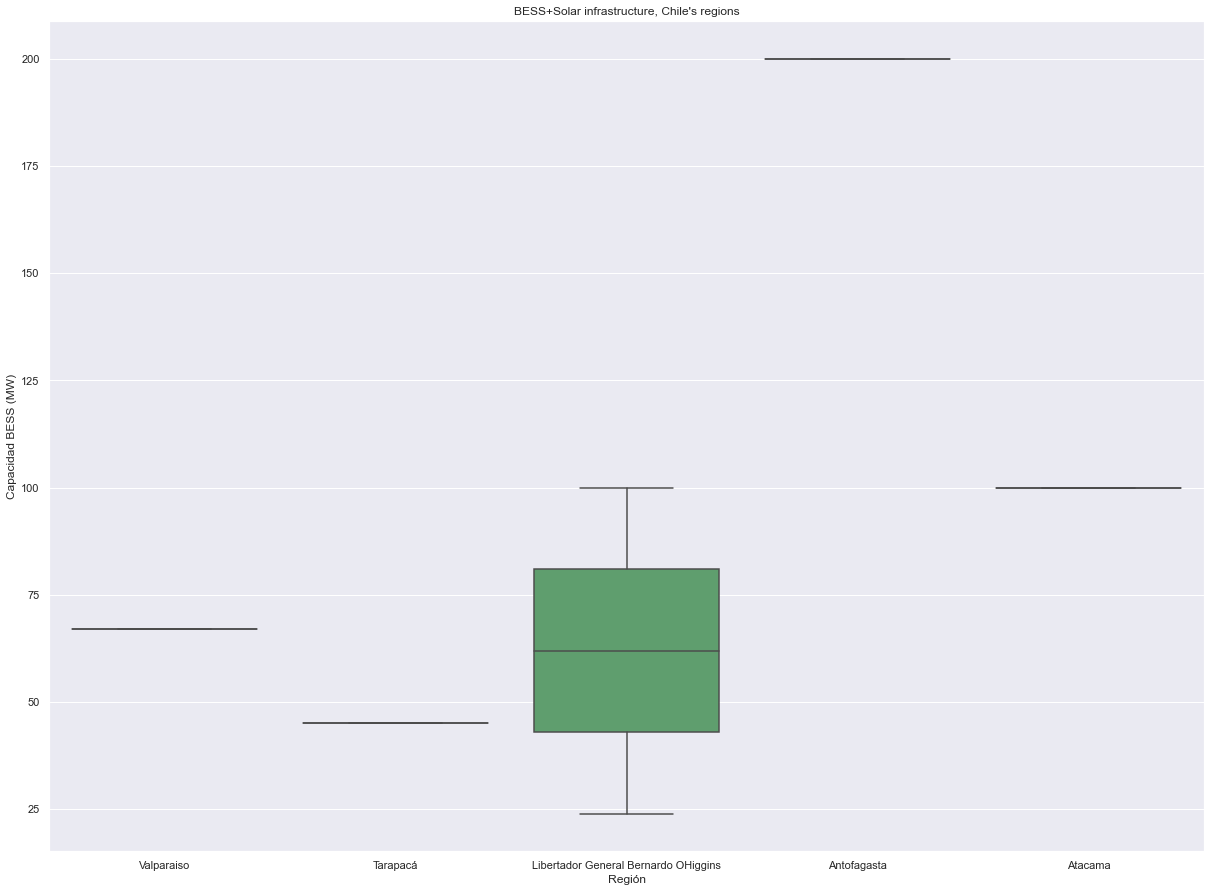

In [96]:
sns.set_style('whitegrid')

sns.set(rc={'figure.figsize':(20.7,15.27)}) #set width and height

ax = sns.boxplot(x='Región',y='Capacidad BESS (MW)',
                data=data_BESS_and_solar_filtrada_cap_informada)

ax.set_title("BESS+Solar infrastructure, Chile's regions")

## 4. Número de horas de operación de las baterías:


In [115]:
# número de Horas de operación BESS 
#numero_empresas_por_region = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región"])['Empresa Solicitante'].count()
#numero_empresas_por_region
data_BESS_and_solar_filtrada_cap_informada['Número de Hrs almacenamiento']
#Número de horas de operación:
numero_horas_operacion = data_BESS_and_solar_filtrada_cap_informada.groupby(["Región","Comuna","Número de Hrs almacenamiento"])['Empresa Solicitante'].count()
numero_horas_operacion



Región                                Comuna        Número de Hrs almacenamiento
Antofagasta                           Sierra Gorda  3,5                             1
Atacama                               Copiapó       5,1                             1
Libertador General Bernardo OHiggins  Peralillo     6                               1
                                      San Fernando  4,3                             1
Tarapacá                              Pozo Almonte  4,03                            1
Valparaiso                            Puchuncaví    3                               1
Name: Empresa Solicitante, dtype: int64

In [216]:
#promedio de duración de las baterías:
promedio_horas_operacion = [c.replace(',', '.') for c in data_BESS_and_solar_filtrada_cap_informada['Número de Hrs almacenamiento']]
promedio_horas_operacion_final = [float(c) for c in promedio_horas_operacion]
len(promedio_horas_operacion_final)
valor_promedio_horas_operacion_BESS = sum(promedio_horas_operacion_final)/len(promedio_horas_operacion_final)
print("valor_promedio_horas_operacion_BESS Híbridas (Solar+BESS)",np.round(valor_promedio_horas_operacion_BESS,decimals = 2),"Hrs")
promedio_horas_operacion_final

valor_promedio_horas_operacion_BESS Híbridas (Solar+BESS) 4.32 Hrs


[3.0, 4.03, 4.3, 3.5, 5.1, 6.0]

In [200]:
df_grafica_horas_operacion = data_BESS_and_solar_filtrada_cap_informada[["Comuna",
                                                                        "Número de Hrs almacenamiento"]]

In [201]:
df_grafica_horas_operacion

,Comuna,Número de Hrs almacenamiento
0,Puchuncaví,3
1,Pozo Almonte,"4,03"
2,San Fernando,"4,3"
3,Sierra Gorda,"3,5"
4,Copiapó,"5,1"
5,Peralillo,6


In [202]:
df_grafica_horas_operacion
df_grafica_horas_operacion['number of hours of storage/discharge'] = promedio_horas_operacion_final
df_grafica_horas_operacion
dfi = df_grafica_horas_operacion[['Comuna','number of hours of storage/discharge']]
dfi

##dfi = df_grafica_horas_operacion.set_index('Región')
#dfi
dfi2 = dfi.set_index('Comuna')
dfi2
##mayor capacidad instalada: 
##dfi2 = df_grafica_horas_operacion.sort_values('Número de Hrs almacenamiento',ascending=False)
##dfi2

,number of hours of storage/discharge
Comuna,
Puchuncaví,3.00
Pozo Almonte,4.03
San Fernando,4.30
Sierra Gorda,3.50
Copiapó,5.10
Peralillo,6.00


In [204]:
dfi2.iplot(kind = 'bar',#x = df_grafica_horas_operacion['Región'], 
                       #         y = df_grafica_horas_operacion['number of hours of storage/discharge'],        
           xTitle = 'commune',
             yTitle = "Number of Hrs storage",title = 'Storage time behavior by Commune Proyect BESS+Solar')#,
        #) 

In [206]:
#Agrupación de proyectos según punto de conexión

In [207]:
puntos_conexion = data_BESS_and_solar_filtrada.groupby(["Región","Comuna","Punto de Conexión"])["Proyecto"].count()
puntos_conexion


Región                                Comuna           Punto de Conexión                               
Antofagasta                           Antofagasta      S/E Central Lalackama 220 kV                        1
                                      Sierra Gorda     S/E Laberinto 220 kV                                1
Atacama                               Chañaral         Línea 1x110 kV Mantoverde - Planta de Bombeo N°2    1
                                      Copiapó          Cerro Negro Norte - Totoralillo C1                  1
                                                       S/E Central Luz del Norte 220 kV                    1
                                                       S/E Seccionadora San Andrés                         1
                                      Freirina         S/E Nueva Maitencillo 220 kV                        1
                                      Tierra Amarilla  S/E Desierto de Atacama 33 kV                       1
                        

In [ ]:
#Extra:

In [215]:
data_BESS_and_solar
#Filtro de los datos que son informados (BESS+Solar:)
df_BESS_and_solar_filtrada_cap_informada = data_BESS_and_solar.loc[data_BESS_and_solar["Capacidad BESS (MW)"]> 0 ]
df_BESS_and_solar_filtrada_cap_informada

guarda_df_data_BESS_and_solar_filtrada = df_BESS_and_solar_filtrada_cap_informada.to_csv("Grid_and_zero_csv/output_data_BESS_and_solar_filtrada.csv")
guarda_df_data_BESS_and_solar_filtrada